# Data Preparation

In [4]:
import pandas as pd

all_games_df = pd.read_csv("data/all_games.csv")

In [5]:
output_a_features = ["FG_PCT_A", "FG3_PCT_A",
                     "FTM_A", "OREB_A", "DREB_A", "REB_A", "AST_A"]
output_b_features = [word.replace("_A", "_B") for word in output_a_features]
output_features = output_a_features + output_b_features

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

import tensorflow as tf

recorded_games = all_games_df[all_games_df["WL_A"] != " "]

X_input = np.asarray(recorded_games[output_features])
y_output = recorded_games["WL_A"]


y_output.replace("L", 0, inplace=True)
y_output.replace("W", 1, inplace=True)

X_input = np.asarray(X_input).astype(np.float32)
y_output = np.asarray(y_output).astype(np.int32)

recorded_games[output_features + ["WL_A"]]
recorded_games[(recorded_games["WL_A"] == 0.0) |
               (recorded_games["WL_A"] == 1.0)]

/tmp/ipykernel_224344/123048592.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_output.replace("L", 0, inplace=True)
/tmp/ipykernel_224344/123048592.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_output.replace("W", 1, inplace=True)
/tmp/ipykernel_224344/123048592.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_output.replace("W", 1, inplace=True)
/tmp/ipykernel_224344/

,Unnamed: 0,SEASON_ID,TEAM_ID_A,TEAM_ABBREVIATION_A,TEAM_NAME_A,GAME_ID,GAME_DATE,MATCHUP_A,WL_A,MIN_A,...,FT_PCT_B,OREB_B,DREB_B,REB_B,AST_B,STL_B,BLK_B,TOV_B,PF_B,PLUS_MINUS_B
0,7,22023,1610612737,ATL,Atlanta Hawks,22301159,2024-04-10,ATL vs. CHA,0.0,240,...,0.955,5.0,28.0,33.0,25,11.0,2,13,18,1.0
1,9,22023,1610612737,ATL,Atlanta Hawks,22301147,2024-04-09,ATL vs. MIA,0.0,292,...,0.714,5.0,41.0,46.0,29,8.0,3,18,16,6.0
2,15,22023,1610612737,ATL,Atlanta Hawks,22301104,2024-04-03,ATL vs. DET,1.0,240,...,0.810,8.0,29.0,37.0,24,14.0,3,10,13,-8.0
3,19,22023,1610612737,ATL,Atlanta Hawks,22301076,2024-03-30,ATL vs. MIL,0.0,239,...,0.800,6.0,34.0,40.0,27,7.0,5,10,18,9.0
4,21,22023,1610612737,ATL,Atlanta Hawks,22301060,2024-03-28,ATL vs. BOS,1.0,265,...,0.857,9.0,34.0,43.0,28,7.0,6,12,15,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52802,211440,21988,1610612766,CHH,Charlotte Hornets,28800140,1988-11-26,CHH vs. WAS,0.0,220,...,0.788,14.0,28.0,42.0,25,7.0,1,17,25,NaN
52803,211446,21988,1610612766,CHH,Charlotte Hornets,28800115,1988-11-22,CHH vs. DET,0.0,240,...,0.920,15.0,34.0,49.0,18,4.0,5,17,15,NaN
52804,211452,21988,1610612766,CHH,Charlotte Hornets,28800071,1988-11-15,CHH vs. NJN,0.0,240,...,0.519,16.0,30.0,46.0,22,9.0,5,19,24,NaN
52805,211458,21988,1610612766,CHH,Charlotte Hornets,28800024,1988-11-08,CHH vs. LAC,1.0,240,...,0.564,13.0,35.0,48.0,21,8.0,6,20,34,NaN


In [7]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X_input, y_output, test_size=0.2, random_state=3)

In [8]:
print(y_train)

[0 1 1 ... 1 1 0]


# Without Tuning

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import metrics
from tensorflow import keras

model = Sequential()
model.add(keras.Input(shape=(14,)))
model.add(Dense(30, activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=[keras.metrics.Accuracy(), metrics.MeanSquaredError(),
             metrics.AUC()],
)

model.fit(X_train, y_train, epochs=30, validation_split=0.3, verbose=1)

Epoch 1/30
924/924 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 5.0051e-04 - auc_1: 0.4969 - loss: 115504.2422 - mean_squared_error: 1007288009621504.0000 - val_accuracy: 0.0000e+00 - val_auc_1: 0.5000 - val_loss: 0.6870 - val_mean_squared_error: 0.2469
Epoch 2/30
924/924 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - auc_1: 0.4982 - loss: 4250.1514 - mean_squared_error: 264798273011712.0000 - val_accuracy: 0.0000e+00 - val_auc_1: 0.5000 - val_loss: 0.7002 - val_mean_squared_error: 0.2535
Epoch 3/30
924/924 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - auc_1: 0.5013 - loss: -48337.3984 - mean_squared_error: 1350437710069760.0000 - val_accuracy: 0.0000e+00 - val_auc_1: 0.5000 - val_loss: 0.7076 - val_mean_squared_error: 0.2572
Epoch 4/30
924/924 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - auc_1: 0.4986 - loss: -77669.8125 - mean_squared_error: 1142660211408896.0000 - val_accuracy: 0.0000e+00 - val_auc_1: 0.5000 - val_loss: 0.7159 - val_mean_squared_e

330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Best Neural Network classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4120
           1       0.61      1.00      0.76      6440

    accuracy                           0.61     10560
   macro avg       0.30      0.50      0.38     10560
weighted avg       0.37      0.61      0.46     10560



/home/rohanbendapudi/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rohanbendapudi/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rohanbendapudi/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

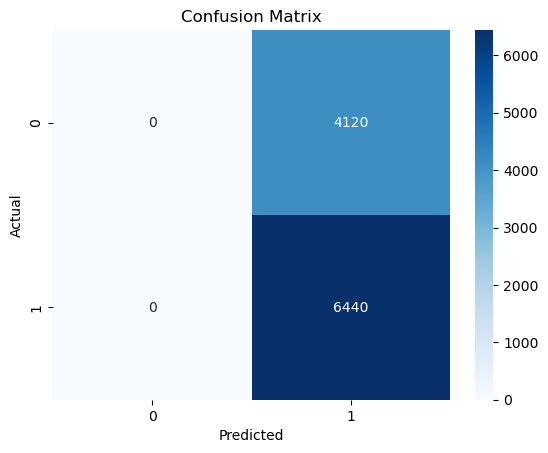

In [70]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_proba = model.predict(x=X_test)

# print(y_pred_proba)

# y_pred = np.argmax(y_pred_proba)
# # y_test_true = np.argmax(y_test)

# # print(y_test_true)
# custom_threshold = 0.5
# y_pred_proba = (y_pred_proba >= custom_threshold).astype(int)

# print(y_pred_proba)


# Evaluate the model
print("Best Neural Network classification report:")
print(classification_report(y_test, y_pred_proba))

# Confusion matrix
conf_matrix_nn = confusion_matrix(y_test, y_pred_proba)
sns.heatmap(conf_matrix_nn, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# With Tuning

In [13]:
import keras_tuner as kt


def model_builder(hp):
    model = Sequential()

    hp_units = hp.Int("units", min_value=32, max_value=512, step=32)

    hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])

    activations = hp.Choice("activation", values=["relu", "tanh"])
    final_activation = hp.Choice("activation", values=["sigmoid", "softmax"])

    model.add(keras.Input(shape=(14,)))
    model.add(Dense(units=hp_units, activation=activations))
    model.add(Dense(units=hp_units, activation=activations))
    model.add(Dense(2, activation="softmax"))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )

    return model


tuner = kt.Hyperband(
    model_builder,
    objective="val_accuracy",
    max_epochs=10,
    factor=3,
    directory="my_dir",
    project_name="second",
)

print(tuner)

stop_early = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)

tuner.search(X_train, y_train, epochs=5, validation_split=0.2, callbacks=[stop_early])

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)

print(best_hps)

print(
    f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
"""
)

Trial 2 Complete [00h 00m 00s]

Best val_accuracy So Far: None
Total elapsed time: 00h 00m 01s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
64                |384               |units
0.01              |0.001             |learning_rate
relu              |relu              |activation
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2


Traceback (most recent call last):
  File "/home/rohanbendapudi/.local/lib/python3.10/site-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/home/rohanbendapudi/.local/lib/python3.10/site-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/home/rohanbendapudi/.local/lib/python3.10/site-packages/keras_tuner/src/tuners/hyperband.py", line 427, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
  File "/home/rohanbendapudi/.local/lib/python3.10/site-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/home/rohanbendapudi/.local/lib/python3.10/site-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model,

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "/home/rohanbendapudi/.local/lib/python3.10/site-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/home/rohanbendapudi/.local/lib/python3.10/site-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/home/rohanbendapudi/.local/lib/python3.10/site-packages/keras_tuner/src/tuners/hyperband.py", line 427, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
  File "/home/rohanbendapudi/.local/lib/python3.10/site-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/home/rohanbendapudi/.local/lib/python3.10/site-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "/home/rohanbendapudi/.local/lib/python3.10/site-packages/keras_tuner/src/engine/hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
  File "/home/rohanbendapudi/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/rohanbendapudi/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py", line 554, in categorical_crossentropy
    raise ValueError(
ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 2)


In [11]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
results = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

val_acc_per_epoch = results.history["val_accuracy"]
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print("Best epoch: %d" % (best_epoch,))

Epoch 1/50


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 2)

In [116]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_proba = model.predict(x=X_test)

print(y_pred_proba)

# y_pred = np.argmax(y_pred_proba)
# # y_test_true = np.argmax(y_test)

# # print(y_test_true)
# custom_threshold = 0.5
# y_pred_proba = (y_pred_proba >= custom_threshold).astype(int)

# print(y_pred_proba)

print(y_pred)

# Evaluate the model
print("Best Neural Network classification report:")
print(classification_report(y_test, y_pred_proba))

# Confusion matrix
# conf_matrix_nn = confusion_matrix(y_test, y_pred_proba)
sns.heatmap(conf_matrix_nn, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
[[nan]
 [nan]
 [nan]
 ...
 [nan]
 [nan]
 [nan]]
0
Best Neural Network classification report:


/home/rohanbendapudi/.local/lib/python3.10/site-packages/sklearn/utils/_array_api.py:290: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y_pred contains NaN.